In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
data=pd.read_csv(r"simplelinearregression.csv")

In [ ]:
data

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [ ]:
data.shape

(7, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [ ]:
data.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [ ]:
data.describe()

,Age,Premium
count,7.000000,7.000000
mean,25.857143,20214.285714
std,5.273474,6283.955382
min,18.000000,10000.000000
25%,22.500000,16500.000000
50%,26.000000,21000.000000
75%,29.500000,25250.000000
max,33.000000,27000.000000


In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull()

,Age,Premium
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


In [ ]:
data.isnull().sum()

Age        0
Premium    0
dtype: int64

In [ ]:
data.isnull().sum().sum()

0

<Axes: xlabel='Age'>

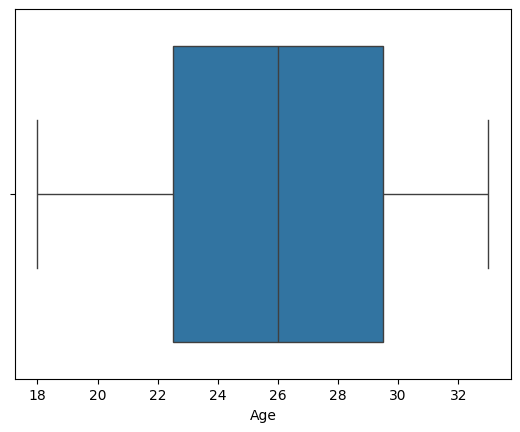

In [ ]:
sns.boxplot(x=data["Age"])

<Axes: xlabel='Premium'>

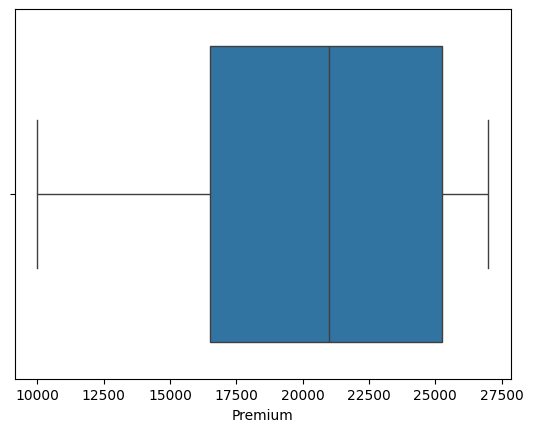

In [ ]:
sns.boxplot(x=data["Premium"])

<Axes: >

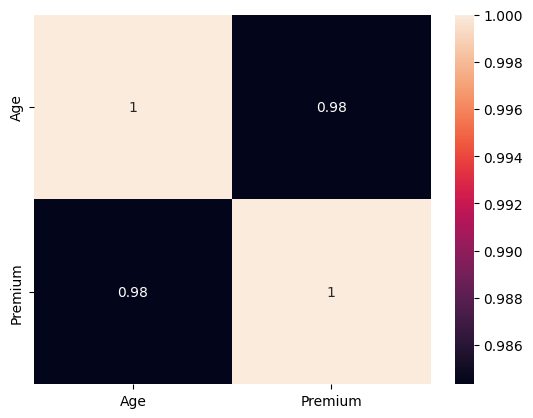

In [ ]:
sns.heatmap(data.corr(),annot=True)

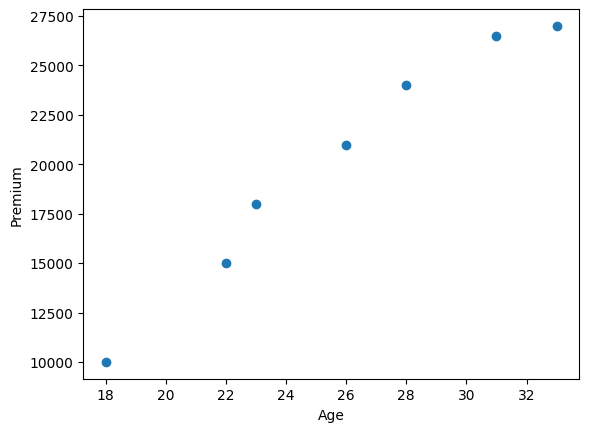

In [ ]:
#Scatter Plot
x=data["Age"].values
y=data["Premium"].values
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

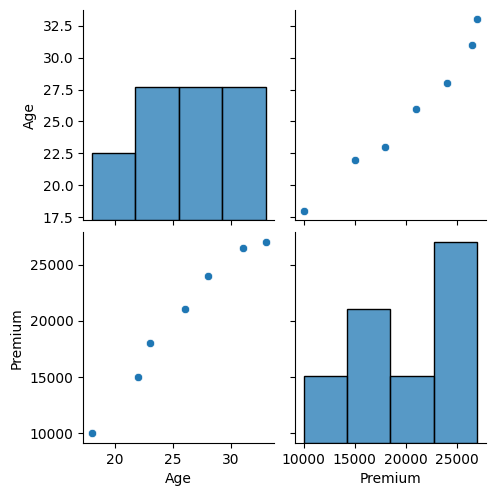

In [ ]:
#Pair Plot(For Continous Range Of Values)
sns.pairplot(data)

Spliting Of Dataset(train set,test set)

In [ ]:
#Train Test Split
x=data.iloc[:,:-1]
y=data.iloc[:,1]

In [ ]:
x.head()

,Age
0,18
1,22
2,23
3,26
4,28


In [ ]:
y.head()

0    10000
1    15000
2    18000
3    21000
4    24000
Name: Premium, dtype: int64

Model Training

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)

In [ ]:
x_train

,Age
3,26
4,28
5,31
1,22


In [ ]:
y_train

3    21000
4    24000
5    26500
1    15000
Name: Premium, dtype: int64

In [ ]:
x_test

,Age
2,23
6,33
0,18


In [ ]:
y_test

2    18000
6    27000
0    10000
Name: Premium, dtype: int64

In [ ]:
#Model Building
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Predicting the y value
y_pred=model.predict(x_test)
y_pred

array([16745.61403509, 29757.30994152, 10239.76608187])

In [ ]:
#New Predicted Value
y_pred_new=model.predict([[50]])
y_pred_new

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51877.19298246])

In [ ]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Difference in %":((y_pred-y_test)/(y_test)*100)})
df

,Actual,Predicted,Difference in %
2,18000,16745.614035,-6.968811
6,27000,29757.309942,10.212259
0,10000,10239.766082,2.397661


In [ ]:
#Checking the accuracy using R2 score
rsq=r2_score(y_test,y_pred)
print(rsq)

0.9361723730189464


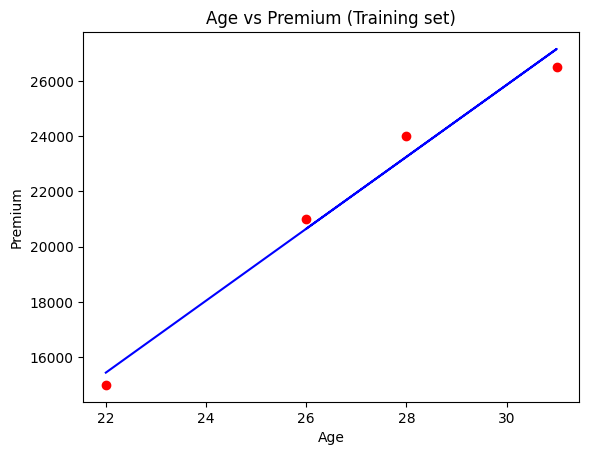

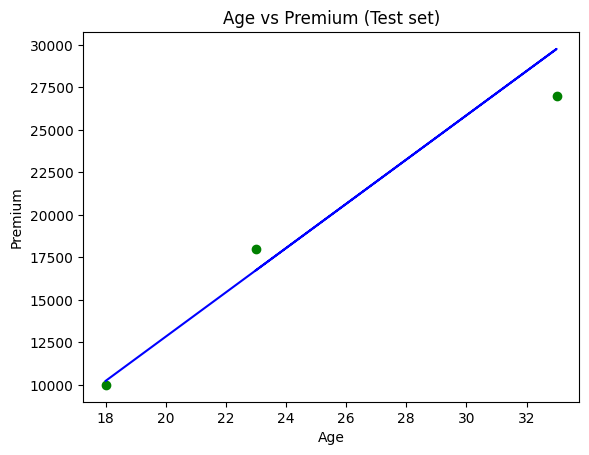

In [ ]:
#Scatter Plot
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,model.predict(x_train),color="blue")
plt.title("Age vs Premium (Training set)")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

plt.scatter(x_test,y_test,color="green")
plt.plot(x_test,y_pred,color="blue")
plt.title("Age vs Premium (Test set)")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

In [ ]:
#Identifying Mean Squared Error(MSE)
mse=mean_squared_error(y_test,y_pred)
print(mse)

3077910.0121974736
